In [16]:
# preprocessing
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA, PCA

# load data
matfile = loadmat('face.mat')
data = matfile['X']

# create labels, there are 10 images of each face
labels = []
for i in range(52):
    labels.extend([i] * 10)
labels = np.array(labels)

# train and test set
d, N = data.shape
train_idx = []
test_idx = []
for i in range(N//10):
    s = i * 10
    train_idx.extend(list(range(s, s+8)))
    test_idx.extend(list(range(s+8, s+10)))
X_train = np.take(data, train_idx, axis=1)
X_test = np.take(data, test_idx, axis=1)
y_train = np.take(labels, train_idx, axis=0)
y_test = np.take(labels, test_idx, axis=0)


# split train set into 4 sets of 104 images
# need to 2 images of each class in each split
X_sets, y_sets = [], []
for i in range(4):
    X_sets.append(X_train[:, i::4])
    y_sets.append(y_train[i::4])

In [33]:
# incremental pca
inc_pca = IncrementalPCA(batch_size=104, n_components=10)
inc_pca.fit(X_train.T);

pca = PCA(n_components=400)
pca.fit(X_train.T);


In [37]:
# Nearest neighbour
from sklearn.neighbors import KNeighborsClassifier

def predict(pca, X_train, y_train, X_test, y_test):
    """Perform NN-classification on training data, with a fitted sklearn-pca object"""
    # test and training data is (d, N) matrix
    d, N = X_train.shape
    train_subspace = pca.transform(X_train.T)
    test_subspace = pca.transform(X_test.T)
    # use all samples as neighbors
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(train_subspace, y_train)
    predictions = neigh.predict(test_subspace)
    return predictions

p = predict(inc_pca, X_train, y_train, X_test, y_test)
acc = np.count_nonzero(p==y_test) / len(y_test)
print(f'{acc=:.4f}')



acc=0.5096


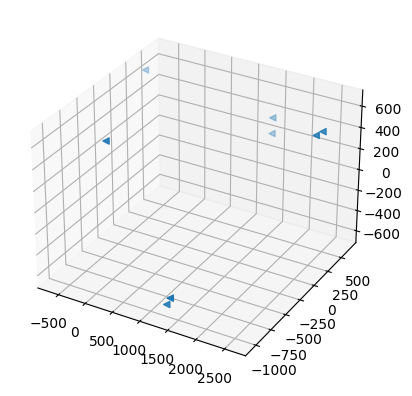

In [26]:
vis_pca = PCA(n_components=3)
vis_pca.fit(X_train.T)
s_test = vis_pca.transform(X_test[:, :8].T)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(s_test[:, 0], s_test[:, 1], s_test[:, 2], marker='<')
ax.legend=True